In [3]:
# data analysis,EDA and visaualization
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

os.listdir()
df  = pd.read_csv("loan.csv")
display(df.head());print(df.shape)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


(39717, 111)


In [4]:
print(list(df.columns))
needed = ["loan_status",'loan_amnt','term', 'int_rate','emp_title', 'emp_length', 'home_ownership', 'annual_inc',"purpose","title"]
dt = df[needed];print(dt.shape)
dt.head()

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

,loan_status,loan_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,purpose,title
0,Fully Paid,5000,36 months,10.65%,NaN,10+ years,RENT,24000.0,credit_card,Computer
1,Charged Off,2500,60 months,15.27%,Ryder,< 1 year,RENT,30000.0,car,bike
2,Fully Paid,2400,36 months,15.96%,NaN,10+ years,RENT,12252.0,small_business,real estate business
3,Fully Paid,10000,36 months,13.49%,AIR RESOURCES BOARD,10+ years,RENT,49200.0,other,personel
4,Current,3000,60 months,12.69%,University Medical Group,1 year,RENT,80000.0,other,Personal


In [5]:
cleanInterest = []
for i in dt['int_rate']:
    x = i.replace("%","")
    x = float(x)
    cleanInterest.append(x)
dt["InterestRatesClean"] = cleanInterest
dt = dt.drop("int_rate",axis = 1)
dt.head(2)

,loan_status,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,purpose,title,InterestRatesClean
0,Fully Paid,5000,36 months,NaN,10+ years,RENT,24000.0,credit_card,Computer,10.65
1,Charged Off,2500,60 months,Ryder,< 1 year,RENT,30000.0,car,bike,15.27


In [6]:
clean_year = []
for i in dt['emp_length']:
    x = str(i).replace("years","").replace("year","").replace("< 1","0.5").replace("+","")
    x = float(x) * 12
    clean_year.append(x)

dt = dt.drop("emp_length",axis = 1)
dt['empInMonths'] = clean_year
dt.head()

,loan_status,loan_amnt,term,emp_title,home_ownership,annual_inc,purpose,title,InterestRatesClean,empInMonths
0,Fully Paid,5000,36 months,NaN,RENT,24000.0,credit_card,Computer,10.65,120.0
1,Charged Off,2500,60 months,Ryder,RENT,30000.0,car,bike,15.27,6.0
2,Fully Paid,2400,36 months,NaN,RENT,12252.0,small_business,real estate business,15.96,120.0
3,Fully Paid,10000,36 months,AIR RESOURCES BOARD,RENT,49200.0,other,personel,13.49,120.0
4,Current,3000,60 months,University Medical Group,RENT,80000.0,other,Personal,12.69,12.0


In [7]:
dt['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [8]:
# get a counter
freq = {}
for i in dt['loan_status']:
    if i not in freq:
        freq[i] = 1
    else:
        freq[i]+=1

In [9]:
df.groupby(['loan_status'])['id'].agg('count')

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: id, dtype: int64

In [10]:
strings = ['john',"john","akeem","akeem","akeem"]
def mode(strings):
    freq = {}
    for i in strings:
        if i not in freq:
            freq[i] = 1
        else:
            freq[i]+=1
    d = 0
    empty = []
    for i,j in zip(freq.keys(),freq.values()):
        if j>d:
            empty.append(i)
            print(empty)
            d =j
        else:
            pass
    return empty[-1]

import random
names = [random.choice(['john',"akeem","newton"]) for i in range(100)]


In [11]:
mode(names)

['john']


'john'

In [12]:
dt.groupby('loan_status').agg(mode)

[2500]
[2500, 9000]
[2500, 9000, 10000]
[3000]
[3000, 10000]
[3000, 10000, 14000]
[3000, 10000, 14000, 16000]
[3000, 10000, 14000, 16000, 20000]
[5000]
[5000, 10000]
[' 60 months']
[' 60 months', ' 36 months']
[' 60 months']
[' 36 months']
['Ryder']
['Ryder', nan]
['University Medical Group']
['University Medical Group', 'Lockheed Martin']
['University Medical Group', 'Lockheed Martin', nan]
[nan]
['RENT']
['RENT']
['RENT', 'MORTGAGE']
['RENT']
[30000.0]
[30000.0, 40000.0]
[30000.0, 40000.0, 60000.0]
[80000.0]
[80000.0, 50000.0]
[80000.0, 50000.0, 60000.0]
[24000.0]
[24000.0, 36000.0]
[24000.0, 36000.0, 48000.0]
[24000.0, 36000.0, 48000.0, 75000.0]
[24000.0, 36000.0, 48000.0, 75000.0, 50000.0]
[24000.0, 36000.0, 48000.0, 75000.0, 50000.0, 60000.0]
['car']
['car', 'small_business']
['car', 'small_business', 'other']
['car', 'small_business', 'other', 'debt_consolidation']
['other']
['other', 'debt_consolidation']
['credit_card']
['credit_card', 'debt_consolidation']
['bike']
['bike', 'f

,loan_amnt,term,emp_title,home_ownership,annual_inc,purpose,title,InterestRatesClean,empInMonths
loan_status,,,,,,,,,
Charged Off,10000,36 months,NaN,RENT,60000.0,debt_consolidation,Debt Consolidation,13.49,120.0
Current,20000,60 months,NaN,MORTGAGE,60000.0,debt_consolidation,Debt Consolidation Loan,13.49,120.0
Fully Paid,10000,36 months,NaN,RENT,60000.0,debt_consolidation,Debt Consolidation,10.99,120.0


# <font color = "darkred">EDA using Groupbys</font>

In [14]:
dt.head()

,loan_status,loan_amnt,term,emp_title,home_ownership,annual_inc,purpose,title,InterestRatesClean,empInMonths
0,Fully Paid,5000,36 months,NaN,RENT,24000.0,credit_card,Computer,10.65,120.0
1,Charged Off,2500,60 months,Ryder,RENT,30000.0,car,bike,15.27,6.0
2,Fully Paid,2400,36 months,NaN,RENT,12252.0,small_business,real estate business,15.96,120.0
3,Fully Paid,10000,36 months,AIR RESOURCES BOARD,RENT,49200.0,other,personel,13.49,120.0
4,Current,3000,60 months,University Medical Group,RENT,80000.0,other,Personal,12.69,12.0


<Figure size 640x480 with 0 Axes>

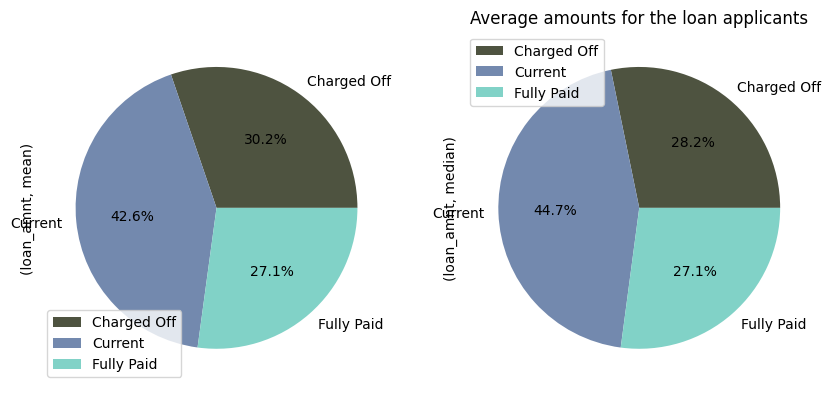

In [44]:
# what was the average loan per loan status
import matplotlib.pyplot as plt
y = dt.groupby('loan_status')[['loan_amnt',"InterestRatesClean","annual_inc"]].agg(["mean","median"])

col = ["#4E5340","#7389AE","#81D2C7"]
plt.figure()
dt.groupby('loan_status')[['loan_amnt']]\
    .agg(["mean","median"])\
    .plot(kind = "pie",subplots=True,autopct='%1.1f%%',figsize = (10,10),colors = col)
plt.title("Average amounts for the loan applicants")
plt.show()
#y.plot(kind = "bar",subplots = True)

#y.reset_index().reset_index()
# what was average annual salary per loan status
# what was the average interest rate per loan status
# what was the loan purpose for each loan status


In [45]:
display(y)

loan_amnt          InterestRatesClean           annual_inc  \
                     mean   median               mean median          mean   
loan_status                                                                  
Charged Off  12104.385108  10000.0          13.820432  13.61  62427.298034   
Current      17053.991228  15825.0          15.031465  14.65  75430.665105   
Fully Paid   10866.455994   9600.0          11.609761  11.49  69862.503328   

                      
              median  
loan_status           
Charged Off  53000.0  
Current      65000.0  
Fully Paid   60000.0

In [53]:
# what was the loan purpose for each loan status
data = dt.groupby(["loan_status","purpose"]).size().reset_index().rename(columns = {0:"count"})
data.head(2)

,loan_status,purpose,count
0,Charged Off,car,160
1,Charged Off,credit_card,542


In [52]:
import plotly_express as px
from plotnine import *

In [57]:
px.histogram(data,x = "purpose",
             y = "count",
             color = "loan_status",
             barnorm = "percent",
             title = "Loan purpose and loan status",
             color_discrete_sequence=px.colors.qualitative.Safe
            )